# Lecture 4: Vectors, Linear operators and Matrices 


Based on: Geoff Gordon's  [vector spaces and dimensions lecture notes](https://qna.cs.cmu.edu/#/pages/view/30) and [matrices and linear operators lecture notes](https://qna.cs.cmu.edu/#/pages/view/184)



## Linear combination, span, and linear independence

If $x_1, x_2 ... x_k \ in V$ are vectors and  $a_1, a_2 ... a_k \in R$, then the vector:

$$x = a_1 x_1 + a_2 x_2 + \ldots + a_k x_k \in V$$

is a **linear combination** of $x_1, x_2 ... x_k$. 

The set of all possible combinations (using any combination of $a_1, a_2 ... a_k$) is called the **span** of $x_1, x_2 ... x_k$.

The zero vector is always in the span of any sets of vectors:
- take all $a_1, a_2 ... a_k$
- there is a setting of $a_1, a_2 ... a_k$ such that at least some of them is not 0 and $a_1 x_1 + a_2 x_2 + \ldots + a_k x_k$ is the zero vector, then $x_1, x_2 ... x_k$ are **linearly dependent**.


In [13]:
# We can use the ndim function in python, which tells us the size
# of the largest linearly independent subset of vectors
import numpy as np

a = np.array([[0,1], [1,0], [1,1]])
print(a)

np.ndim(a)

[[0 1]
 [1 0]
 [1 1]]


2

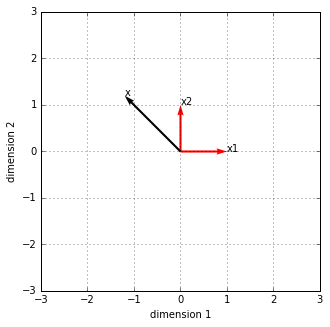

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# try other vectors such as {[-2,2] and [1,3]}, {[1,-1] and [2,-2]}, {[1,0],[0,1] and [-1,1]}
x1 = np.array([1,0])
x2 = np.array([0,1])


# plot figure and vectors
plt.figure(figsize=(5,5))
origin=[0,0]

plt.quiver(*origin, x1[0],x1[1], color='r',angles='xy', scale_units='xy', scale=1)
plt.text(x1[0],x1[1], 'x1')

plt.quiver(*origin, x2[0],x2[1], color='r',angles='xy', scale_units='xy', scale=1)
plt.text(x2[0],x2[1], 'x2')

x = -1.2*x1 + 1.2*x2

plt.quiver(*origin, x[0],x[1], color='k',angles='xy', scale_units='xy', scale=1)
plt.text(x[0],x[1], 'x')


# additional plot setup
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
s = 3 # size of axes
plt.axis([-s,s,-s,s],'equal')
plt.grid();

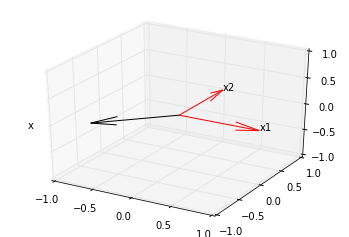

In [3]:
from mpl_toolkits.mplot3d import Axes3D

x1 = np.array([1,0,0])
x2 = np.array([0,1,0])


x = -1.2*x1 - 1.2*x2 

fig = plt.figure()
origin = [0,0,0]
ax = fig.gca(projection='3d')
s = 1
ax.set_xlim3d(-s, s)
ax.set_ylim3d(-s, s)
ax.set_zlim3d(-s, s)

ax.quiver(0, 0, 0, x1[0], x1[1], x1[2],pivot='tail',color='r')
ax.text(*x1, 'x1')

ax.quiver(*origin, *x2,pivot='tail',color='r')
ax.text(*x2, 'x2')

ax.quiver(*origin, *x,pivot='tail',color='k')
ax.text(*x, 'x')


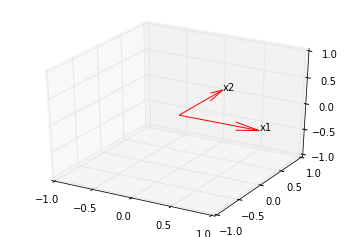

In [4]:
aa1, aa2 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

x1 = np.array([1,0,0])
x2 = np.array([0,1,0])


x = -1.2*x1 - 1.2*x2 

fig = plt.figure()
origin = [0,0,0]
ax = fig.gca(projection='3d')
s = 1
ax.set_xlim3d(-s, s)
ax.set_ylim3d(-s, s)
ax.set_zlim3d(-s, s)

# ax.scatter(aa1*x1[0]+aa2*x2[0],
#            aa1*x1[1]+aa2*x2[1],
#            aa1*x1[2]+aa2*x2[2],marker='.',color='w',depthshade=0.1)


ax.quiver(*origin, *x1,pivot='tail',color='r')
ax.text(*x1, 'x1')

ax.quiver(*origin, *x2,pivot='tail',color='r')
ax.text(*x2, 'x2');

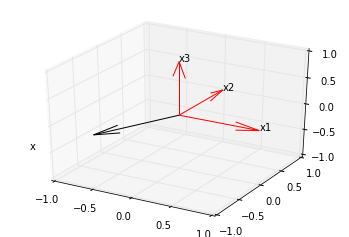

In [5]:
# define a 3D space (x1,x2 and x3 should be linearly independent)

x1 = np.array([1,0,0])
x2 = np.array([0,1,0])
x3 = np.array([0,0,1])


x = -1.2*x1 - 1.2*x2 -0.4*x3

fig = plt.figure()
origin = [0,0,0]
ax = fig.gca(projection='3d')
s = 1
ax.set_xlim3d(-s, s)
ax.set_ylim3d(-s, s)
ax.set_zlim3d(-s, s)

ax.quiver(0, 0, 0, x1[0], x1[1], x1[2],pivot='tail',color='r')
ax.text(*x1, 'x1')

ax.quiver(*origin, *x2,pivot='tail',color='r')
ax.text(*x2, 'x2')

ax.quiver(*origin, *x3,pivot='tail',color='r')
ax.text(*x3, 'x3')

ax.quiver(*origin, *x,pivot='tail',color='k')
ax.text(*x, 'x')


## Basis

If $\{x_1, x_2 ... x_k\}$ is a set of linearly independent vectors in $V$, either
- we can still be able to add a vector $x_{k+1}$ and have the set $\{x_1, x_2 ... x_{k+1}\}$ be linearly independent
- or we cannot: in that case $\{x_1, x_2 ... x_k\}$ is a **basis** for the vector space $V$:
    - $k$ is the dimension of $V$
    - any $x\in V$ can be expressed uniquely as a linear combination of $\{x_1, x_2 ... x_k\}$

For any set of vectors to be linearly independent, no $k$ of them  might lie on a $k-1$ space (no two vectors might lie on a line or 3 vectors on a plane).

### How to find a basis? 

See Geoff Gordon's [finding coordinate representations lecture notes](https://qna.cs.cmu.edu/#/pages/view/187)

Given inner product space $V$ and an associated basis $B = \{b_1, b_2, \ldots, b_n\}\subseteq V$, we can express each $x \in V$ as:

$$x = \textstyle\sum_{i=1}^n \tilde x_i b_i$$

How to find the coordinates $\tilde x_i$?
- Take the inner product: 
$\langle x, b_j\rangle = \textstyle\sum_{i=1}^n \tilde x_i \langle b_i, b_j\rangle$
- Define vector $g$ and matrix $G$ such that $g_i = \langle x, b_j\rangle $ and $G_{ij} = \langle b_i, b_j\rangle $, we have:
$$g = G \tilde x$$


In [6]:
# solve for basis

x1 = np.array([0.5,0.5])
x2 = np.array([-0.5,0.5])

Basis = np.array([x1,x2])
G = Basis.dot(Basis.T)

x = np.array([2,1])

g = Basis.dot(x)

from scipy import linalg
tx = linalg.solve(G,g)

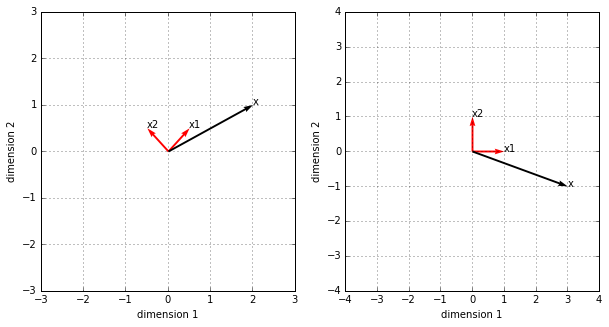

In [7]:
def plot_2d_vec(ax,x1,x2,x,s=3,label1='dimension 1',label2='dimension 1'):
    origin=[0,0]

    ax.quiver(*origin, x1[0],x1[1], color='r',angles='xy', scale_units='xy', scale=1)
    ax.text(x1[0],x1[1], 'x1')

    ax.quiver(*origin, x2[0],x2[1], color='r',angles='xy', scale_units='xy', scale=1)
    ax.text(x2[0],x2[1], 'x2')

    ax.quiver(*origin, x[0],x[1], color='k',angles='xy', scale_units='xy', scale=1)
    ax.text(x[0],x[1], 'x')

    # additional plot setup
    ax.set_xlabel('dimension 1')
    ax.set_ylabel('dimension 2')
    ax.axis([-s,s,-s,s],'equal')
    ax.grid();


f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

plot_2d_vec(ax1,x1,x2,x)

plot_2d_vec(ax2,(1,0),(0,1),tx,s=4)



What if B is not a basis?
- not linearly dependent (typically throws error)
- not enough vectors: higher dimension, would still work (silent failure)
    - can check residual:
    $$r = x - \textstyle\sum_{i=1}^n \tilde x_i b_i \neq 0$$
    get an approximation of $x$: out of all the vectors in the span of the set $\{x_1...x_k\}$, get the closest one to $x$ 

## Infinite dimensional vector spaces

If we can find arbitrarily many linearly independent vectors, we say that the dimension of $V$ is infinite. A good example is function.

Consider functions of the form:
$$q_x(y) = e^{-(x-y)^2/2}$$

and form a vector space by taking the span of such functions 

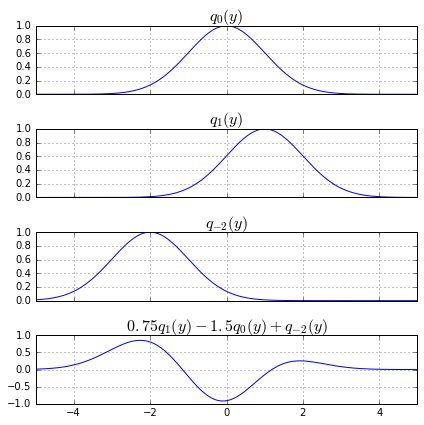

In [8]:
y = np.linspace(-5,5,1001)
# y = 0

f, ax = plt.subplots(4, 1, figsize = (6,6),sharex=True)


q0 = np.exp(-y**2/2)
ax[0].plot(y,q0)
ax[0].grid()
ax[0].set_title('$q_0(y)$',fontsize=16);

q1 = np.exp(-(y-1)**2/2)
ax[1].plot(y,q1)
ax[1].grid()
ax[1].set_title('$q_1(y)$',fontsize=16);

q_2 = np.exp(-(y+2)**2/2)
ax[2].plot(y,q_2)
ax[2].grid()
ax[2].set_title('$q_{-2}(y)$',fontsize=16);

q = q1*0.75 - q0*1.5 +q_2
ax[3].plot(y,q)
ax[3].grid()
ax[3].set_title('$0.75q_1(y)-1.5q_0(y)+q_{-2}(y)$',fontsize=16);

ax[3].set_xlim([-5,5])
plt.tight_layout()

### Inner product of functions

We saw that $\langle f, g\rangle=\int_{\mathbb R} f(x)\, g(x)\, dx$ is an inner product for functions earlier, but that inner product is not always useful for the kinds of algorithms we want to build.

Instead we use the following as an inner product for basis functions:

$$\langle q_x, q_y\rangle = q_x(y) = q_y(x)$$

and for any pairs of functions $f$ and $g$ in the span:

$$\langle f, g\rangle = \left \langle \sum_{i=1}^n a_i q_{x_i} , \sum_{j=1}^n b_j q_{x_j} \right \rangle = \sum_{i=1}^n a_i b_j \langle q_{x_i},q_{x_j}\rangle = \sum_{i=1}^n a_i b_j q_{x_i} (x_j)$$


### Learning linear classifiers in infinite dimensions

We saw the linear fisher discriminant and how we can use it with a feature map $\phi(x)$

The example we saw was:

$\phi(x) = (x_1, x_2, x_1x_2, x_1^2, x_2^2) \quad \phi\in \mathbb R^2\to \mathbb R^5\,.$

What if we want to let our algorithm be more flexible?


(-1.5, 2.5, -1.0, 1.5)

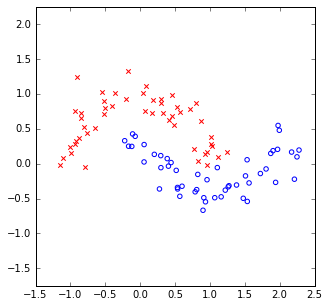

In [9]:
from sklearn import datasets

plt.figure(figsize=(5,5))
X, y = datasets.make_moons(n_samples=100, noise=.15)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],marker='x', c='r')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],facecolors='none', edgecolors='b')
plt.axis('equal')


We can use the same algorithm and learn the discriminant in the same way, but using an infinite feature vector, for example:
$$\phi_x(y) = e^{-\|x-y\|^2/2\sigma^2}$$
    
$f_{w,b}(x) = \langle w ,\phi(x)\rangle - b$

Using (same assumptions as before):
\begin{align*}w &= E(\phi(x)\mid\text{class is }\color{red}{\mathsf{x}}) - E(\phi(x)\mid \text{class is }\color{blue}{\mathsf{o}})\\ b& = w\cdot [E(\phi(x)\mid\text{class is }\color{red}{\mathsf{x}}) + E(\phi(x)\mid \text{class is }\color{blue}{\mathsf{o}})]/2\end{align*}


NameError: name 'w_hat' is not defined

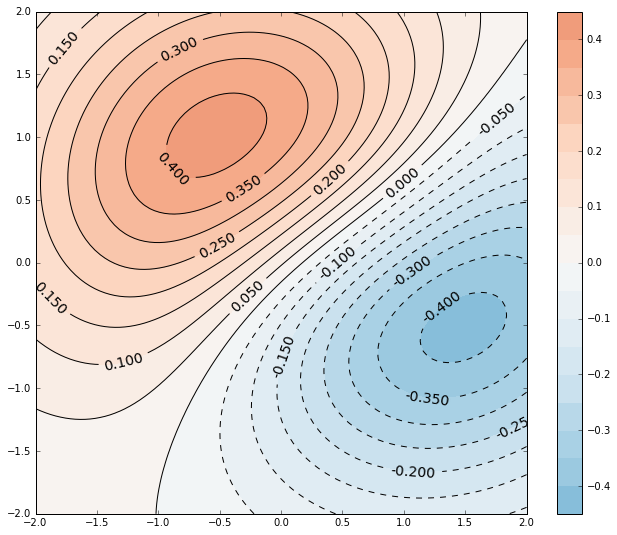

In [10]:
x1 = np.linspace(-2,2,100)
x2 = np.linspace(-2,2,100)
X1,X2 = np.meshgrid(x1, x2)
sigma = 1

def k(x,y,sigma):
    return np.exp(-np.sum((x-y)**2)/(2*sigma**2))

# there is a faster way to do this, but let's do it simply for now
K_mat = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        K_mat[i,j] = k(X[i],X[j],sigma)
b = 1/2*(np.mean(K_mat[y==0]) - np.mean(K_mat[y==1]))

x_data = X[y==0]
o_data = X[y==1]

def f_hat(x1,x2): 
    val = np.zeros((x1.shape[0],x1.shape[1]))
    for i in range(x1.shape[0]):
        for j in range(x1.shape[1]):
            p_x = np.mean([k(np.array([x1[i,j],x2[i,j]]),xi,sigma) for xi in x_data])
            p_o = np.mean([k(np.array([x1[i,j],x2[i,j]]),xi,sigma) for xi in o_data])  
            val[i,j] = p_x - p_o - b
    return val
f_hat_X = f_hat(X1,X2)


plt.figure(figsize=(11,9))

cs = plt.contourf(X1, X2, f_hat_X,20,cmap='RdBu_r',vmin=-1,vmax=1);
plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.clabel(contours, inline=True, fontsize=14)
origin = [0], [0]
plt.quiver(*origin, w_hat[0],w_hat[1], color='k',angles='xy', scale_units='xy', scale=1)

plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],marker='x', c='r')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],facecolors='none', edgecolors='b')
plt.axis([-2,2,-2,2],'equal')

$\sigma$ is the kernel width. High values: smooth functions, low values: less smooth functions.

This function can also be specified as:
$$\phi_x(y) = e^{- \gamma \|x-y\|^2}$$



# Matrices and linear operators

## Functions on a vector space

We saw functions from $ \mathbb{R}^n\rightarrow \mathbb{R}$$ but we can have functions between other feature spaces, e.g.:

- $\mathbb{R}^2\rightarrow\mathbb{R}^5$ (example we saw last lecture)
- if $H$ is the span of all functions $q_y=e^{(x-y)^2}$, then we can have functions $e_z \in H \rightarrow \mathbb{R}$  that evaluates any function $f \in H$: $e_z(f) = f(z)$.

### Functionals and operators
Operators map one vector space to another: $f \in U \rightarrow V$.
Functionals are a special case and map from a vector space to the reals: $f \in U \rightarrow \mathbb{R}.$


## Linear operators:

An operator if called linear if it satisfies:

$$f(ax + by) = af(x) + bf(y)$$

example: matrix multiplication by an $m \times n$ matrix ($f(x) =Ax$) is a linear operator $f \in \mathbb{R}^n\rightarrow \mathbb{R}^m$.

other example (on an infinite dimentional vector space) is the operator $\frac{d}{dx}$ that acts on differentiable functions in $\mathbb{R}\rightarrow\mathbb{R}$.

## Coordinates

We have been talking about vectors in a coordinate free or abstract manner. We can also consider some vector spaces like $R_n$ in a concrete manner by specifying their coordinates. To do so, we need a basis $B = \{b_1, b_2,...b_n)$ and any vector $x$ can be expressed as $x = \tilde x_1b_1 + \tilde x_2 b_2 + \ldots + \tilde x_n b_n$ where the scalars $\tilde x$ are the coordinates:

$$x \in V\ \leftrightarrow\ \left(\begin{array}{c}\tilde x_1 \\ \vdots \\ \tilde x_n\end{array}\right) \in \mathbb R^n\,.$$

If we choose another basis, the coordinates will change (the representation changes), but the vector $x$ will remain the same.

## Matrices

**Linear operator $L$ and matrix $\tilde L$:** 

Given a space $V$ with basis $B=\{b_1...b_n\}$ and a space $U$ with basis $C=\{c_1...c_m\}$, and a linear operator:
$$L \in U\rightarrow V$$

we pick a matrix $\tilde L$ that, given $x$ with coordinate representation $\tilde x$, applying $L$ to $x$ is equivalent to multiplying $\tilde L$ by $\tilde x$. $\tilde L$  is consistent with the bases $B$ and $C$ we have assigned.

$$\left(\begin{array}{ccc}\tilde L_{11} & \ldots & \tilde L_{1n} \\ \vdots & \ddots & \vdots \\ \tilde L_{m1} &\ldots & \tilde L_{mn} \end{array}\right)\ \in\ \mathbb R^{m\times n}\,.$$


$$Lx = y \quad\text{is equivalent to}\quad \tilde L\tilde x = \tilde y\,.$$

$L \in U\rightarrow V$ and $\tilde L \in \mathbb{R}^n\rightarrow \mathbb{R}^m$. 

We can pick different bases and  $\tilde L$ will change but $L$ will not change, only the representation of it will.

## Slices

$\tilde L_{1:3:12,4}$

In [ ]:
L = np.arange(100).reshape([10,10])
print(L)
print(L[::2,3])

## Transpose and adjoint

(consider Hilbert spaces = complete inner product spaces)

For any linear operator $L: U\rightarrow V$, there exist an adjoint operator $L^*: V\rightarrow U$ such that:

$$\langle Lx, y\rangle_V = \langle x, L^*y\rangle_U \quad\text{for all }x\in U, y\in V\,.$$


If we have a coordinate representation $\tilde L\in\mathbb R^{m\times n}$ then the coordinate representation of the adjoint $L^*$ is the matrix transpose:

$$\tilde L^T = (\tilde L_{ji}) = \left(\begin{array}{ccc}\tilde L_{11} & \ldots & \tilde L_{m1} \\ \vdots & \ddots & \vdots \\ \tilde L_{1n} &\ldots & \tilde L_{mn} \end{array}\right)\,.$$

If we take the adjoint twice, we get back the original operator: $L^{**} = L$, and if we take the transpose twice, we get back the original matrix $\tilde L^{\top\top} = \tilde L$.

If $U=V$ we can potentially have $L^*=L$, called a self-adjoint. This $\tilde L = \tilde L^\top$, i.e. a symmetric matrix. 

### Inverse

(consider Hilbert spaces = complete inner product spaces)

For a linear operator $L: U\rightarrow V$, we say $L^{-1}: V\rightarrow U$ is an inverse if it satisfies:

$$x = L^{-1}y\ \text{ whenever }\ y = Lx \qquad$$

Or equivalently: $$x = L^{-1}Lx, \ \ y = LL^{-1} y \ \ \text{for all}\ \ x\in U,\, y\in V\,.$$

The inverse doesn't always exist, and when it does we call $L$ invertible, and $(L^{-1})^{-1} = L$.

If $L$ is not invertible, it is called singular. 

The pseudoinverse $L^\dagger$ is define as the inverse whenever that makes sense: if we take $x = L^\dagger$, the error $||x L -  b||$ is as small as possible.

We can define an inverse operation on matrices as well, if $A$ and $A^{-1}$ are matrices that satisfy

$$AA^{-1}x =x \qquad A^{-1}A y = y$$

for all $x,y \in \mathbb{R}^n$, then we say that $A^{-1}$ is the inverse of $A$.

The matrix inverse $\tilde L ^{-1}$ is the corresponding coordinate represenation of the $L ^{-1}$.


The matrix pseudoinverse $\tilde L^\dagger$ is the corresponding coordinate represenation of the pseudoinverse $L^\dagger$.
